<a href="https://colab.research.google.com/github/salvatore-juarezh/inteligencia-artificial/blob/main/cnn/ropa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#maneja datos tabulares
#importar librerias con lo que usaremos para trabajar
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#data set y permisos
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
#info del data set
fashion_mnist.load_data

<function keras.src.datasets.fashion_mnist.load_data()>

In [ ]:
#variable para clasificar
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
#conjunto de datos
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
index = 8950

In [ ]:
#tamaño de matriz
image.shape

NameError: name 'image' is not defined

In [ ]:
#relacion imagen con tabla
image = train_images[index]
label = train_labels[index]

In [ ]:
#valores cercanos a cero es blanco
#valores mayores a cero es negro
print(image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  12  63  86 119 130  55   0
    0   1   1   1   1   0   0   0   0   0]
 [  0   0   7   0 120 141  86  66  77  77  82  80  47  14   0  28 129   0
    0   0   0   0   0   0   0   0  13   0]
 [  0  31 181 171 204 197 187 174 195 195 188 172 164 169 150 182 183 122
  150 138 133 131 132 129 150 167 178 182]
 [  0  21 209 165 153 148 162 169 158 160 167 165 165 167 169 15

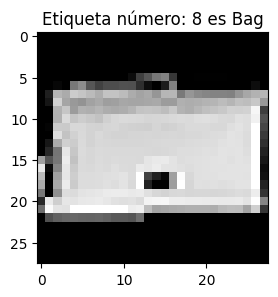

In [ ]:
#resultado de busqueda relacionada con la matriz
plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.gray)
plt.title(f'Etiqueta número: {label} es {class_names[label]}')
plt.show()

In [ ]:
#entrenamiento 60000 filas de 28 x 28
#usara 10000 datos
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
#255 esta en el intervalo de [0,1]
# Normalizar las imágenes para que los valores estén en el rango [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Crear el modelo de CNN
#red convolucional
#recibe una imagen de 28x28
model = Sequential([
    #3x3 es el kernet o filtro
    #32 convoluciones
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    #2*2
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    #aplana el vector
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#tasa de aprendizaje deseada
#funcion de perdida
#
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

In [ ]:
#metrica de presicion acura
model.compile(optimizer=adam_optimizer,
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history= model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7417 - loss: 0.6973 - val_accuracy: 0.8612 - val_loss: 0.3694
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8787 - loss: 0.3301 - val_accuracy: 0.8872 - val_loss: 0.3158
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8963 - loss: 0.2799 - val_accuracy: 0.8926 - val_loss: 0.2944
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9099 - loss: 0.2429 - val_accuracy: 0.8996 - val_loss: 0.2818
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9161 - loss: 0.2242 - val_accuracy: 0.9004 - val_loss: 0.2842
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9265 - loss: 0.1982 - val_accuracy: 0.9042 - val_loss: 0.2643
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9318 - loss: 0.1855 - val_accuracy: 0.9055 - val_loss: 0.2701
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9377 - loss: 0.1652 

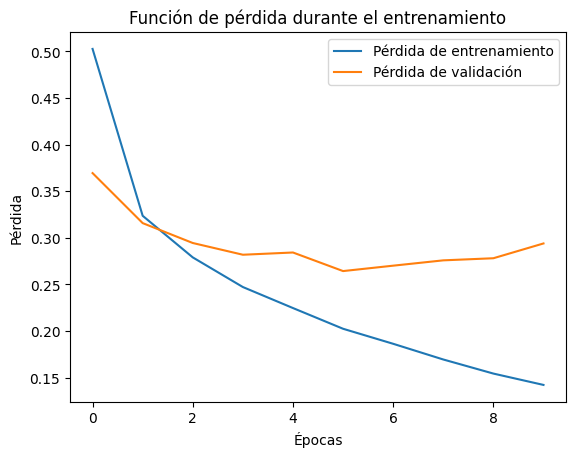

In [ ]:
#grafica de funcion perdida
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()
#el modelo esta memorizando los datos de entrenamiento en lugar de aprender, por lo que su rendimiento empeora con datos nuevos.

In [ ]:
#evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9080 - loss: 0.2939


In [ ]:
probability_model = Sequential([model, Softmax()])
predictions = probability_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
#calcular matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

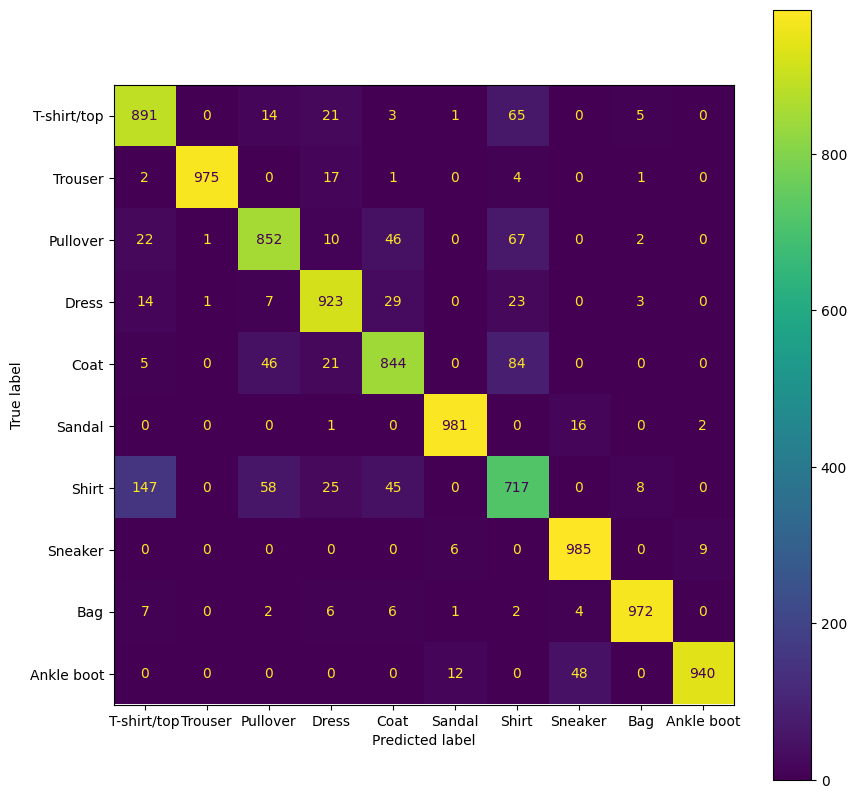

In [ ]:
# Graficar matriz de confusión
#851 las clasifico tshirt, 1 trouser, 24 pullover
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()
#Buen modelo, pero podría mejorarse con más datos de entrenamiento o ajustes para distinguir mejor entre camisas, playeras y suéteres.

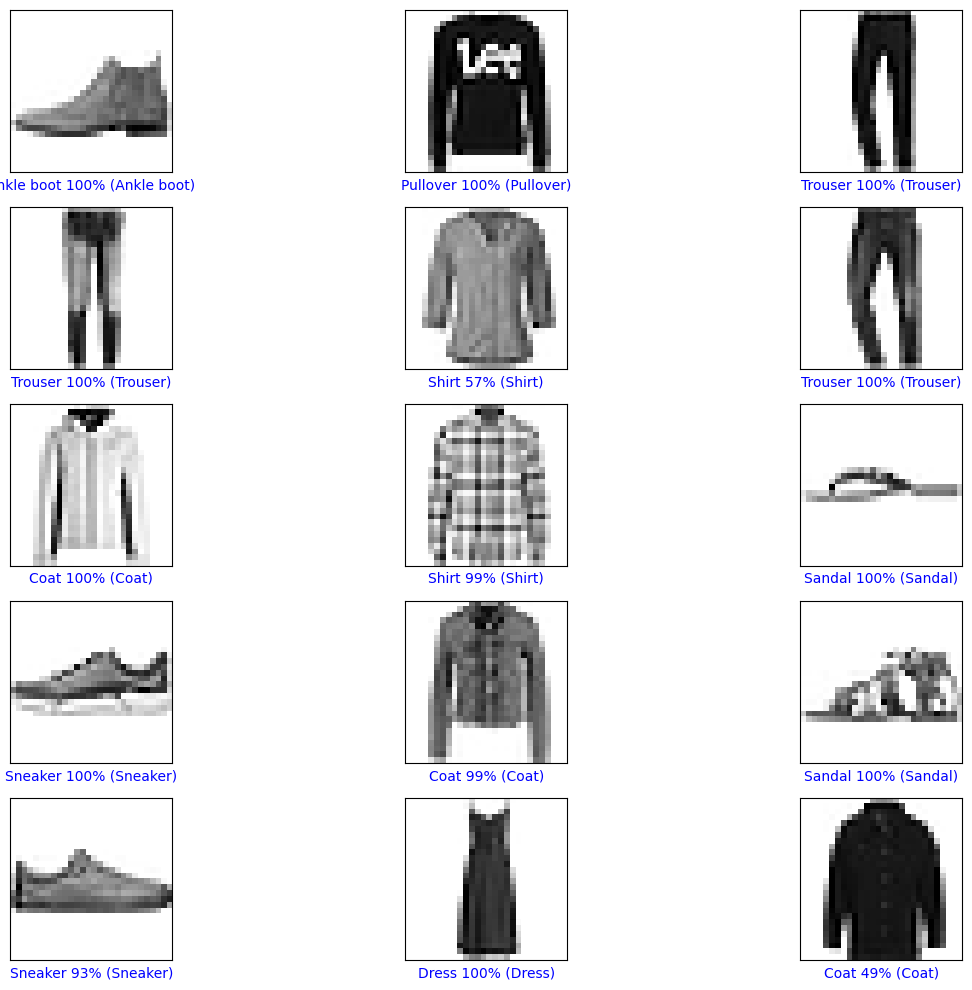

In [ ]:
#función para mostrar cada imagen con su predicción
def plot_image(i, predictions_array, true_label, img):
    #tomar los datos de la imagen
    true_label, img = true_label[i], img[i]


    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    #mostrar la imagen en escala de grises (28x28 píxeles)
    plt.imshow(img.reshape((28, 28)), cmap=plt.cm.binary)

    #qué clase predijo el modelo y con qué porcentaje de confianza
    predicted_label = tf.argmax(predictions_array).numpy()

    #si acierta, azul, si falla rojo
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    #poner etiqueta
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*tf.reduce_max(predictions_array).numpy(),
                                         class_names[true_label]),
                                         color=color)

#lista para las clases de ropa
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#configurar cuántas imágenes queremos mostrar (5 filas x 3 columnas = 15 imágenes)
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

#crean figura
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

#mostrar cada una de las 15 imágenes
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)  #osicionar cada imagen
    plot_image(i, predictions[i], test_labels, test_images)  #llamar función

#ajustar espacio
plt.tight_layout()
plt.show()